In [614]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [615]:
iris_data = pd.read_csv("iris-data.csv")

In [616]:
iris_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [617]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [618]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [619]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [620]:
#drop na by

In [621]:
iris_data_0 = iris_data.dropna()
iris_data_0

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [622]:
iris_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [623]:
iris_data_0.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [624]:
iris_data_0.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


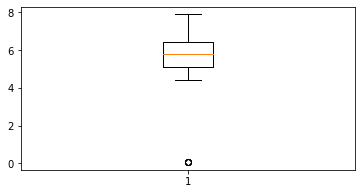

None


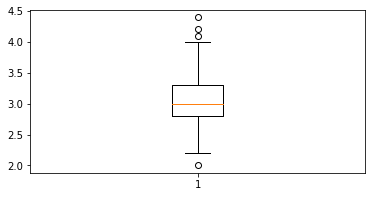

None


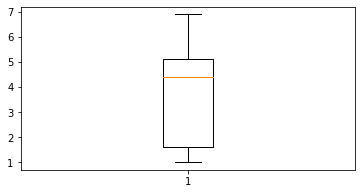

None


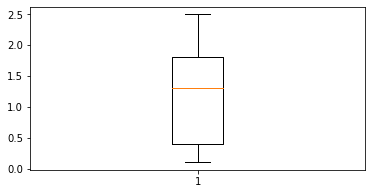

None


In [625]:
fig = plt.figure(figsize =(6, 3))

plt.boxplot(iris_data_0['sepal_length_cm'])
print(plt.show())

fig = plt.figure(figsize =(6, 3))

plt.boxplot(iris_data_0['sepal_width_cm'])
print(plt.show())

fig = plt.figure(figsize =(6, 3))

plt.boxplot(iris_data_0['petal_length_cm'])
print(plt.show())

fig = plt.figure(figsize =(6, 3))

plt.boxplot(iris_data_0['petal_width_cm'])
print(plt.show())

[Text(0.5, 0, 'sepal_length_cm'),
 Text(0, 0.5, 'petal_width_cm'),
 Text(0.5, 1.0, 'Iris Petal')]

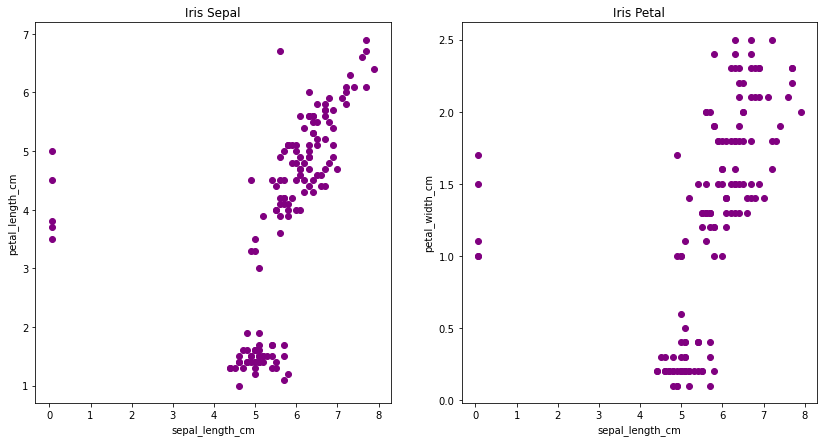

In [626]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris_data_0['sepal_length_cm'], iris_data_0['petal_length_cm'], c='purple')
axs[0].set(xlabel='sepal_length_cm', ylabel='petal_length_cm', title='Iris Sepal')
axs[1].scatter(iris_data_0['sepal_length_cm'], iris_data_0['petal_width_cm'], c='purple')
axs[1].set(xlabel='sepal_length_cm', ylabel='petal_width_cm', title='Iris Petal')

In [627]:
# Pearson

print(iris_data_0['sepal_length_cm'].corr(iris_data_0['sepal_width_cm'], method='pearson'))
print(iris_data_0['petal_length_cm'].corr(iris_data_0['petal_width_cm'], method='pearson'))
print(iris_data_0['sepal_length_cm'].corr(iris_data_0['petal_width_cm'], method='pearson'))
print(iris_data_0['petal_length_cm'].corr(iris_data_0['sepal_width_cm'], method='pearson'))

0.07392566908809851
0.9589339013907309
0.46973444774460127
-0.4119392542951421


In [628]:
# Spearman

print(iris_data_0['sepal_length_cm'].corr(iris_data_0['sepal_width_cm'], method='spearman'))
print(iris_data_0['petal_length_cm'].corr(iris_data_0['petal_width_cm'], method='spearman'))
print(iris_data_0['sepal_length_cm'].corr(iris_data_0['petal_width_cm'], method='spearman'))
print(iris_data_0['petal_length_cm'].corr(iris_data_0['sepal_width_cm'], method='spearman'))

-0.07693184061675866
0.9359755063957527
0.7699065980584795
-0.2791463554705381


In [629]:
iris_correlation = iris_data_0.corr()
iris_correlation

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.073926,0.480736,0.469734
sepal_width_cm,0.073926,1.000000,-0.411939,-0.348464
petal_length_cm,0.480736,-0.411939,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


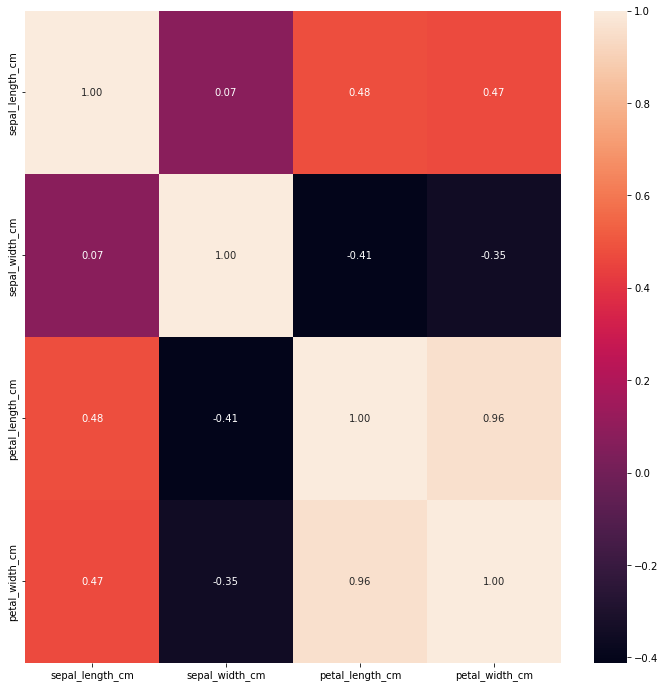

In [630]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(iris_data_0.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

### Conclusions

- There is a high correlation between petal_length_cm and petal_width_cm
- There are outliers in sepal_width_cm and sepal_length_cm, so the data distribution is more scattered
- We can clean the outliers for having a more concentrating data

In [631]:
iris_data_0["class"].unique() 

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [632]:
iris_data_0["class"] = iris_data_0["class"].replace({'Iris-setosa':'Iris-setossa', 'versicolor':'Iris-versicolor'})
iris_data_0["class"].unique()

/var/folders/hw/hn42sv9d3y3g8s91ckv76flh0000gn/T/ipykernel_89033/2171232494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_0["class"] = iris_data_0["class"].replace({'Iris-setosa':'Iris-setossa', 'versicolor':'Iris-versicolor'})


array(['Iris-setossa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [633]:
#iris_data_0["class_1"]= iris_data["class_1"].str.encode
#pd.get_dummies(df['country'], prefix='country')

iris_type = pd.get_dummies(iris_data_0["class"], prefix='type')
iris_type["key"] = 0
iris_type

,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica,key
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
145,0,0,1,0
146,0,0,1,0
147,0,0,1,0
148,0,0,1,0


In [634]:
iris_data_0["key"]= 0
#iris_data_f = iris_data_0.merge([iris_type])
iris_data_f = iris_data_0.join(iris_type, lsuffix='_x', rsuffix='_y')

/var/folders/hw/hn42sv9d3y3g8s91ckv76flh0000gn/T/ipykernel_89033/3865137261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_0["key"]= 0


In [635]:
iris_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length_cm       145 non-null    float64
 1   sepal_width_cm        145 non-null    float64
 2   petal_length_cm       145 non-null    float64
 3   petal_width_cm        145 non-null    float64
 4   class                 145 non-null    object 
 5   key_x                 145 non-null    int64  
 6   type_Iris-setossa     145 non-null    uint8  
 7   type_Iris-versicolor  145 non-null    uint8  
 8   type_Iris-virginica   145 non-null    uint8  
 9   key_y                 145 non-null    int64  
dtypes: float64(4), int64(2), object(1), uint8(3)
memory usage: 13.6+ KB


In [636]:
iris_data_f.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class', 'key_x', 'type_Iris-setossa',
       'type_Iris-versicolor', 'type_Iris-virginica', 'key_y'],
      dtype='object')

In [637]:
iris_data_f["type_Iris-setossa"] = pd.Series(iris_data_f["type_Iris-setossa"], dtype='float64')
iris_data_f["type_Iris-versicolor"] = pd.Series(iris_data_f["type_Iris-versicolor"], dtype='float64')
iris_data_f["type_Iris-virginica"] = pd.Series(iris_data_f["type_Iris-virginica"], dtype='float64')

In [638]:
iris_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length_cm       145 non-null    float64
 1   sepal_width_cm        145 non-null    float64
 2   petal_length_cm       145 non-null    float64
 3   petal_width_cm        145 non-null    float64
 4   class                 145 non-null    object 
 5   key_x                 145 non-null    int64  
 6   type_Iris-setossa     145 non-null    float64
 7   type_Iris-versicolor  145 non-null    float64
 8   type_Iris-virginica   145 non-null    float64
 9   key_y                 145 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 16.5+ KB


In [639]:
iris_data_f = iris_data_f.drop(["key_x", "key_y"], axis=1)

In [640]:
iris_data_f.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552,0.310345,0.344828,0.344828
std,1.326540,0.435096,1.742955,0.755058,0.464238,0.476960,0.476960
min,0.055000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [641]:
iris_data_f.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
sepal_length_cm,1.000000,0.073926,0.480736,0.469734,-0.315334,-0.173650,0.480573
sepal_width_cm,0.073926,1.000000,-0.411939,-0.348464,0.595493,-0.458796,-0.120815
petal_length_cm,0.480736,-0.411939,1.000000,0.958934,-0.917847,0.176864,0.716502
petal_width_cm,0.469734,-0.348464,0.958934,1.000000,-0.878535,0.086242,0.768861
type_Iris-setossa,-0.315334,0.595493,-0.917847,-0.878535,1.000000,-0.486664,-0.486664
type_Iris-versicolor,-0.173650,-0.458796,0.176864,0.086242,-0.486664,1.000000,-0.526316
type_Iris-virginica,0.480573,-0.120815,0.716502,0.768861,-0.486664,-0.526316,1.000000


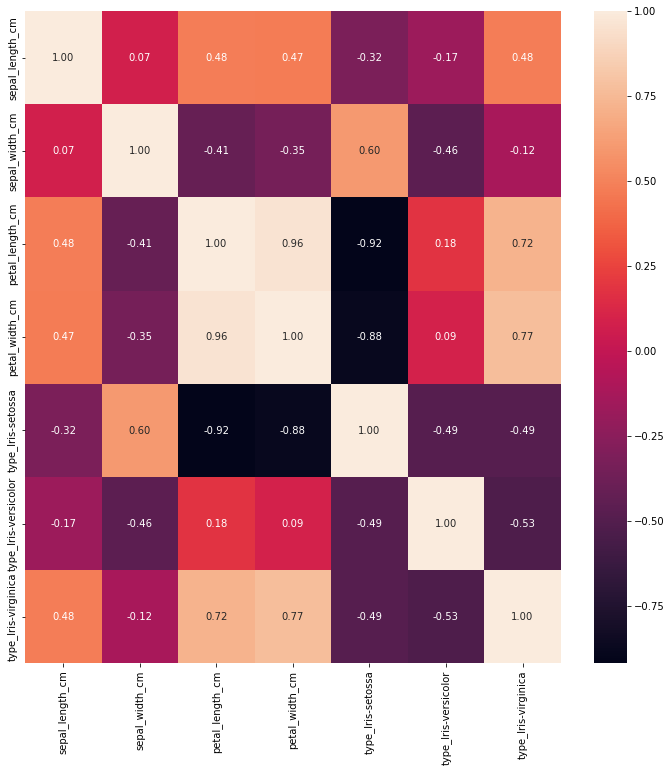

In [642]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(iris_data_f.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [643]:
list(iris_data_f["sepal_length_cm"].unique())

[5.1,
 4.9,
 4.7,
 4.6,
 5.0,
 5.4,
 4.8,
 5.7,
 5.8,
 5.2,
 5.5,
 4.4,
 4.5,
 5.3,
 7.0,
 6.4,
 6.9,
 6.5,
 6.3,
 6.6,
 5.9,
 6.0,
 6.1,
 5.6,
 6.7,
 6.2,
 6.8,
 0.067,
 0.06,
 0.057,
 0.055,
 7.1,
 7.6,
 7.3,
 7.2,
 7.7,
 7.4,
 7.9]

In [644]:
list(iris_data_f["sepal_width_cm"].unique())

[3.5,
 3.0,
 3.2,
 3.1,
 3.6,
 3.9,
 3.4,
 4.0,
 4.4,
 3.8,
 3.7,
 3.3,
 4.1,
 4.2,
 2.3,
 2.8,
 2.4,
 2.9,
 2.7,
 2.0,
 2.2,
 2.5,
 2.6]

In [645]:
list(iris_data_f["petal_length_cm"].unique())

[1.4,
 1.3,
 1.5,
 1.7,
 1.1,
 1.2,
 1.0,
 1.9,
 1.6,
 4.7,
 4.5,
 4.9,
 4.0,
 4.6,
 3.3,
 3.9,
 3.5,
 4.2,
 3.6,
 4.4,
 4.1,
 4.8,
 4.3,
 5.0,
 3.8,
 3.7,
 5.1,
 3.0,
 6.0,
 5.9,
 5.6,
 5.8,
 6.6,
 6.3,
 6.1,
 5.3,
 5.5,
 6.7,
 6.9,
 5.7,
 6.4,
 5.4,
 5.2]

In [646]:
list(iris_data_f["petal_width_cm"].unique())

[0.2,
 0.4,
 0.3,
 0.1,
 0.5,
 0.6,
 1.4,
 1.5,
 1.3,
 1.6,
 1.0,
 1.1,
 1.8,
 1.2,
 1.7,
 2.5,
 1.9,
 2.1,
 2.2,
 2.0,
 2.4,
 2.3]

In [647]:
#iris_data_f["petal_width_cm"] = iris_data_f["petal_width_cm"].drop(0.067, axis=0)

print(iris_data_f["sepal_length_cm"].loc[iris_data_f["sepal_length_cm"][:] == 0.067])
print(iris_data_f["sepal_length_cm"].loc[iris_data_f["sepal_length_cm"][:] == 0.06])
print(iris_data_f["sepal_length_cm"].loc[iris_data_f["sepal_length_cm"][:] == 0.057])
print(iris_data_f["sepal_length_cm"].loc[iris_data_f["sepal_length_cm"][:] == 0.055])

iris_data_f


77    0.067
Name: sepal_length_cm, dtype: float64
78    0.06
Name: sepal_length_cm, dtype: float64
79    0.057
Name: sepal_length_cm, dtype: float64
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setossa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setossa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setossa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setossa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setossa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,2.3,Iris-virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [648]:
iris_data_f["petal_width_cm"] = iris_data_f["petal_width_cm"].drop([77, 78, 79, 80, 81], axis=0)

#iris_data_f = iris_data_f["sepal_length_cm"].drop([79])
#iris_data_f = iris_data_f["sepal_length_cm"].drop([80])
#iris_data_f = iris_data_f["sepal_length_cm"].drop([81])
#iris_data_f["sepal_length_cm"].unique()



In [649]:
iris = iris_data_f.dropna()
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setossa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setossa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setossa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setossa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setossa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,2.3,Iris-virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [650]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.870714,3.060000,3.827143,1.235714,0.321429,0.321429,0.357143
std,0.806136,0.433955,1.770089,0.766574,0.468702,0.468702,0.480878
min,4.400000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.350000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [651]:
iris.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
sepal_length_cm,1.000000,-0.104553,0.845509,0.796611,-0.704161,0.061270,0.626613
sepal_width_cm,-0.104553,1.000000,-0.422192,-0.362677,0.590692,-0.438597,-0.148243
petal_length_cm,0.845509,-0.422192,1.000000,0.959093,-0.923699,0.175845,0.728918
petal_width_cm,0.796611,-0.362677,0.959093,1.000000,-0.887172,0.087959,0.778977
type_Iris-setossa,-0.704161,0.590692,-0.923699,-0.887172,1.000000,-0.473684,-0.512989
type_Iris-versicolor,0.061270,-0.438597,0.175845,0.087959,-0.473684,1.000000,-0.512989
type_Iris-virginica,0.626613,-0.148243,0.728918,0.778977,-0.512989,-0.512989,1.000000


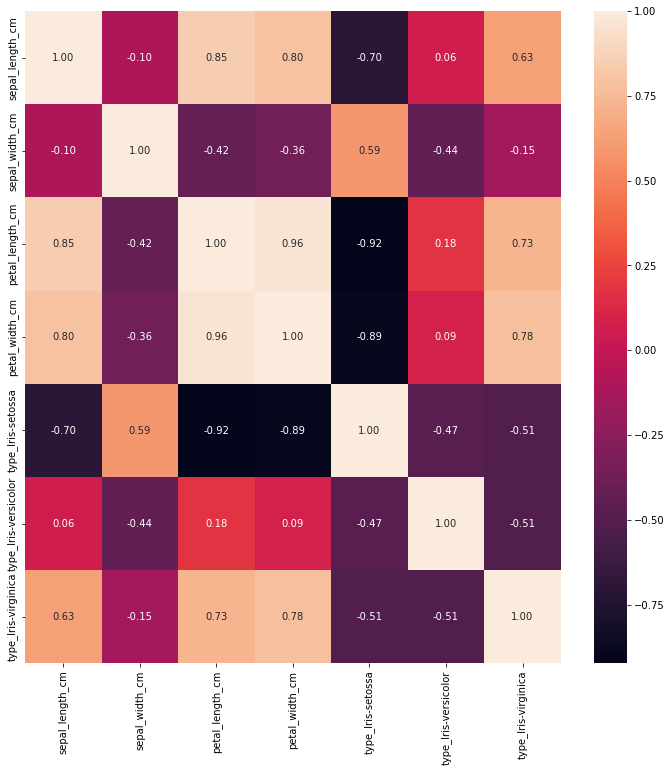

In [652]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(iris.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [611]:
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,type_Iris-setossa,type_Iris-versicolor,type_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setossa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setossa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setossa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setossa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setossa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,2.3,Iris-virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


[Text(0.5, 0, 'sepal_width_cm'),
 Text(0, 0.5, 'petal_width_cm'),
 Text(0.5, 1.0, 'Iris Petal')]

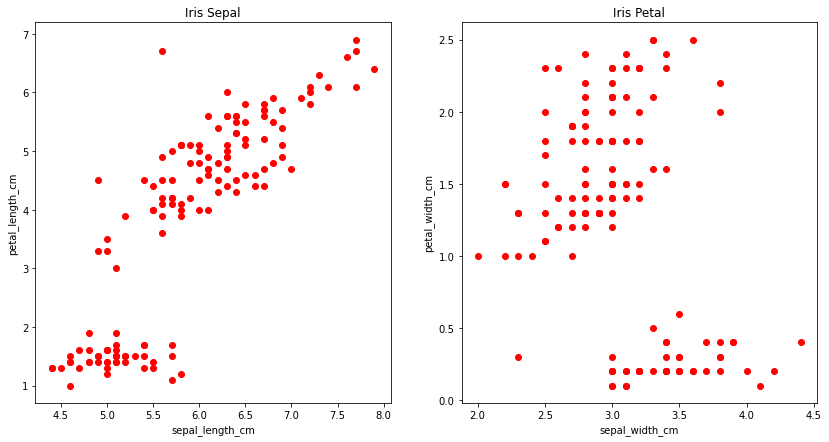

In [613]:
# sepal_length_cm vs petal_length_cm and sepal_width_cm vs petal_width_cm
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris['sepal_length_cm'], iris['petal_length_cm'], c='red')
axs[0].set(xlabel='sepal_length_cm', ylabel='petal_length_cm', title='Iris Sepal')
axs[1].scatter(iris['sepal_width_cm'], iris['petal_width_cm'], c='red')
axs[1].set(xlabel='sepal_width_cm', ylabel='petal_width_cm', title='Iris Petal')